In [23]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
def simulateData(n=1000, k=50, l=10, seedval=420):
    np.random.seed(seedval)
    xs = np.random.random((n, k))
    # Coefficients
    bs = np.random.uniform(size=(k, 1))
    # Randomly setting 10 of them to zero
    bs[np.random.choice(k, size=l),:] = 0
    e = np.random.uniform(size=(n,1))
    # True prediction
    yhat = xs.dot(bs)
    # Adding noise
    y = yhat + e
    print('Lowest possible RMSE = %0.3f' % (np.sqrt(np.sum( (y-yhat)**2 )) ))
    return xs, y.reshape((n,)), bs.reshape((k,))

In [3]:
xs, ys, bs = simulateData()

Lowest possible RMSE = 17.931


In [24]:
xstrn, xstst, ystrn, ystst = train_test_split(xs, ys, test_size=0.5, random_state=420)

In [25]:
lcv = LassoCV(n_jobs=-1, cv=5, normalize=False)
lcv.fit(xstrn, ystrn)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

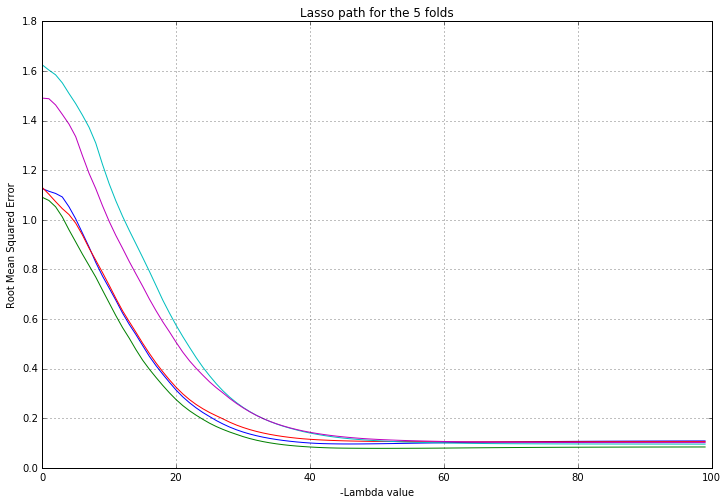

In [69]:
plt.figure(figsize=(12,8))
plt.plot(lcv.mse_path_)
plt.grid()
plt.title("Lasso path for the 5 folds")
plt.xlabel('-Lambda value')
plt.ylabel("Root Mean Squared Error")
plt.show()

In [27]:
ypredls = lcv.predict(xstst)

In [28]:
# Fitting regression
regr = linear_model.LinearRegression()
regr.fit(xstrn, ystrn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
ypredlm = regr.predict(xstst)

Here we found that OLS actually overfits a slightly on the test data set

In [30]:
print('LASSO RMSE = %0.3f' % (np.sqrt(np.sum( (ystst-ypredls)**2 )) ))
print('OLS RMSE = %0.3f' % (np.sqrt(np.sum( (ystst-ypredlm)**2 )) ))

LASSO RMSE = 6.830
OLS RMSE = 6.882


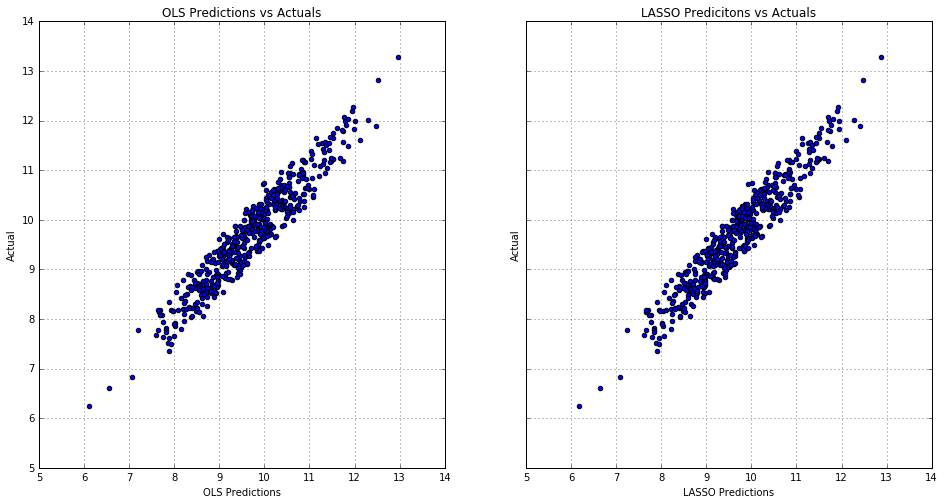

In [60]:
# Making a plot of  both
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,8))
ax1.set_xlabel('OLS Predictions')
ax1.set_ylabel('Actual')
ax1.grid()
ax1.scatter(ypredlm, ystst)
ax1.set_title('OLS Predictions vs Actuals')
ax2.scatter(ypredls, ystst)
ax2.grid()
ax2.set_title('LASSO Predicitons vs Actuals')
ax2.set_xlabel('LASSO Predictions')
ax2.set_ylabel('Actual')
plt.show()

## Let's look at the individual coefficients

In [31]:
regr.coef_

array([ 0.86804495,  0.01783612,  0.57662582,  0.06648672,  0.32605867,
        0.52296394,  0.66102996, -0.04221456,  0.65875647,  0.42960241,
        0.38594805,  0.16754347,  0.95925376,  0.00950491,  1.00019297,
        0.04091752,  0.06741336,  0.40597301,  0.32857524, -0.04227076,
        0.91674312,  0.44725919,  0.25395067,  0.24524842, -0.03097705,
        0.83233442,  0.49266761,  0.01708783,  0.29628649,  0.33624394,
        0.04100811,  0.60572111, -0.05683505,  0.56044484,  0.59873367,
        0.18482606,  0.84839717, -0.06654882,  0.09135637,  0.0407778 ,
        0.74834619,  1.0339624 ,  0.36508296,  0.37585739,  0.14393687,
        0.03504662,  0.38669187,  0.93126064,  0.55124966,  0.00841059])

In [32]:
lcv.coef_

array([ 0.85657855,  0.00613798,  0.56216864,  0.05256684,  0.30764589,
        0.51330721,  0.64934803, -0.02603843,  0.64893078,  0.41445644,
        0.3717775 ,  0.15912045,  0.94886823,  0.        ,  0.99559582,
        0.02268939,  0.04238479,  0.38870988,  0.31711211, -0.02847324,
        0.90253913,  0.43686298,  0.23915272,  0.23311264, -0.0184158 ,
        0.81555933,  0.47598826,  0.0074163 ,  0.27940753,  0.32841116,
        0.02876876,  0.59547263, -0.04443935,  0.54660772,  0.58450606,
        0.17772406,  0.83818452, -0.04908792,  0.08032936,  0.03487327,
        0.73930744,  1.02368329,  0.35715822,  0.36590694,  0.13796154,
        0.01559868,  0.37697613,  0.92010282,  0.54054265,  0.        ])

In [33]:
lcv.coef_

array([ 0.85657855,  0.00613798,  0.56216864,  0.05256684,  0.30764589,
        0.51330721,  0.64934803, -0.02603843,  0.64893078,  0.41445644,
        0.3717775 ,  0.15912045,  0.94886823,  0.        ,  0.99559582,
        0.02268939,  0.04238479,  0.38870988,  0.31711211, -0.02847324,
        0.90253913,  0.43686298,  0.23915272,  0.23311264, -0.0184158 ,
        0.81555933,  0.47598826,  0.0074163 ,  0.27940753,  0.32841116,
        0.02876876,  0.59547263, -0.04443935,  0.54660772,  0.58450606,
        0.17772406,  0.83818452, -0.04908792,  0.08032936,  0.03487327,
        0.73930744,  1.02368329,  0.35715822,  0.36590694,  0.13796154,
        0.01559868,  0.37697613,  0.92010282,  0.54054265,  0.        ])

We can actually calculate the similarity between these coefficients with a dot product (i.e., an unnormalized [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)), and we see that the LASSO coefficients are more similar to the true data than the OLS coefficients.

In [68]:
print(bs.dot(regr.coef_.T)/ (np.sqrt( np.sum(bs**2 ))*np.sqrt( np.sum(regr.coef_**2 ))) )
print(bs.dot(lcv.coef_.T)/ (np.sqrt( np.sum(bs**2 ))*np.sqrt( np.sum(lcv.coef_**2 ))) )

0.99540374514
0.99550039031
